In [1]:
import sys
sys.path.append("../")

import matplotlib.pyplot as plt
import numpy as np
from src.loaders import load_data, load_labels
from src.classify import MCM_Classifier
from src.plot import  plot_results
import os
from src.plot import plot_confusion_matrix, plot_label_prob_diff


In [2]:
# Customizable environment variables
n_categories = 10  # Number of categories to be classified
n_variables = 121  # Number of variables in the dataset
mcm_filename_format = "train-images-unlabeled-{}_comms.dat"
data_filename_format = "train-images-unlabeled-{}.dat"
data_path = "../INPUT/data/"
communities_path = "../INPUT/MCMs/"
output_path = "../OUTPUT/"

In [3]:
print("{:-^50}".format("  MCM-Classifier  ")) 

test_data = load_data("../INPUT/data/test-images-unlabeled-all-uniform.txt").astype(int)
test_labels = load_labels("../INPUT/data/test-labels-uniform.txt").astype(int)

# Step 1: Initialize classifier
classifier = MCM_Classifier(n_categories, n_variables, mcm_filename_format, data_filename_format, data_path, communities_path)

# Step 2: Train
classifier.fit(greedy=True, max_iter=1000000, max_no_improvement=100000)


# Step 3: Evaluate
predicted_classes, probs = classifier.predict(test_data, test_labels)

# Step 4: Save classification report and other stats
# report = classifier.get_classification_report(test_labels)
classifier.save_classification_report(test_labels,path=output_path)

if (classifier.stats == None):
    raise Exception("Classifier stats not found. Did you forget to call predict()?")


----------------  MCM-Classifier  ----------------
Generating bootstrap samples...
Done!
train-images-unlabeled-0_bootstrap filename
Generating bootstrap samples...
Done!
train-images-unlabeled-1_bootstrap filename
Generating bootstrap samples...
Done!
train-images-unlabeled-2_bootstrap filename
Generating bootstrap samples...
Done!
train-images-unlabeled-3_bootstrap filename
Generating bootstrap samples...
Done!
train-images-unlabeled-4_bootstrap filename
Generating bootstrap samples...
Done!
train-images-unlabeled-5_bootstrap filename
Generating bootstrap samples...
Done!
train-images-unlabeled-6_bootstrap filename
Generating bootstrap samples...
Done!
train-images-unlabeled-7_bootstrap filename
Generating bootstrap samples...
Done!
train-images-unlabeled-8_bootstrap filename
Generating bootstrap samples...
Done!
train-images-unlabeled-9_bootstrap filename
--------------------------------------------------
--  Running MinCompSpin_SimulatedAnnealing...  ---
---------------------------

In [46]:
classifier.get_P()[0][2]

array([0.01419355, 0.01493088, 0.00194553, 0.00194553, 0.00073733,
       0.0156682 , 0.00073733, 0.000553  , 0.00129032, 0.00194553,
       0.00194553, 0.00194553, 0.00194553, 0.00036866, 0.00194553,
       0.00194553, 0.00036866, 0.00036866, 0.00194553, 0.00194553,
       0.00194553, 0.00036866, 0.00194553, 0.00194553, 0.00194553,
       0.00194553, 0.00194553, 0.00194553, 0.00194553, 0.00194553,
       0.00194553, 0.00194553, 0.00534562, 0.00479263, 0.00194553,
       0.00194553, 0.00663594, 0.09898618, 0.000553  , 0.00110599,
       0.00294931, 0.00194553, 0.00147465, 0.00194553, 0.01069124,
       0.0121659 , 0.01013825, 0.00460829, 0.00194553, 0.00194553,
       0.00194553, 0.00194553, 0.00194553, 0.00194553, 0.00194553,
       0.00194553, 0.00194553, 0.00194553, 0.00194553, 0.00194553,
       0.00194553, 0.00194553, 0.00194553, 0.00194553, 0.00036866,
       0.000553  , 0.00194553, 0.00194553, 0.00036866, 0.00147465,
       0.00194553, 0.00194553, 0.00626728, 0.00092166, 0.00110

In [47]:

mcm_c3 = classifier.get_MCMs()[3]
mcm_c5 = classifier.get_MCMs()[5]

icc1_c3_P = classifier.get_P()[3][0] # icc 1 for class 3 probability distribution
icc1_c5_P = classifier.get_P()[5][0] # icc 1 for class 3 probability distribution
mcm_c5.shape,icc1_c3_P.shape

((21,), (4,))

In [65]:
# now for icc1_c3, see what P(C3|image_c5, icc1_c3)
data_c5 = load_data(os.path.join(data_path, data_filename_format.format(5)))
data_c3 = load_data(os.path.join(data_path, data_filename_format.format(3)))
data_c3.shape

(5423, 121)

In [59]:
data_c3[:,0]

array([0, 0, 0, ..., 0, 0, 1])

In [96]:

def generate_p_icc(data, P_single, n_variables,MCM,icc_idx):
    """Get probability distribution of single icc for some set of input images.
    E.g., what probabilities do we get for the first ICC in the MCM for the image of a 5 
    if we show it data of a 3. 
    ==> How good does this ICC differentiate between classes?
    """
    
    icc_Ps = np.zeros(len(data))
    for k, img in enumerate(data):
        idx = [i for i in range(n_variables) if MCM[icc_idx][i] == "1"]
        sm = int("".join([str(s) for s in img[idx]]), 2)
        icc_Ps[k] = P_single[icc_idx][sm] 
    return icc_Ps


In [110]:
# get probability distribution for single ICC for all categories

all_MCM = classifier.get_MCMs()
P =  classifier.get_P()



icc_idx = 6
data = data_c3

icc_Ps = np.zeros((len(data),10))
for j, MCM in enumerate(all_MCM):
    icc_Ps[:,j] = generate_p_icc(data,P[j],n_variables,MCM,icc_idx)








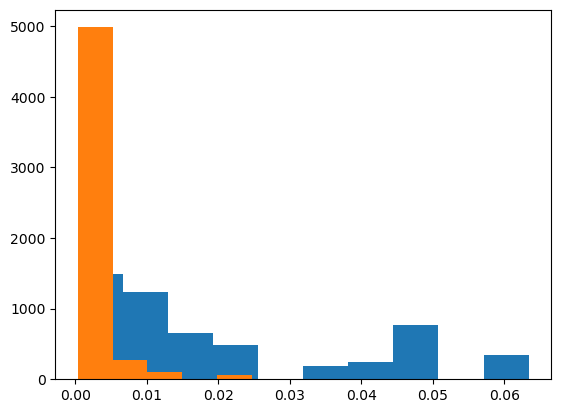

In [108]:
plt.hist(icc_Ps[:,0])
plt.hist(icc_Ps[:,1])
plt.show()

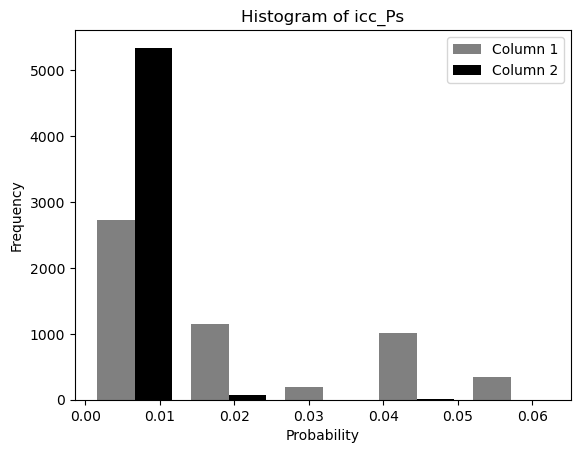

In [109]:
import matplotlib.pyplot as plt


plt.hist(icc_Ps, bins=5, color=['grey', 'black'], label=['Column 1', 'Column 2'])
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Histogram of icc_Ps')
plt.legend()
plt.show()
